## **MNIST AI Class Practice**

## Prepare Data

In [ ]:
import numpy as np
from tensorflow import keras

Get MNIST Dataset

In [ ]:
# data is split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print('Train Images: ', x_train.shape, 
      'Train Labels: ', y_train.shape)
print('Test Images: ', x_test.shape, 
      'Test Labels: ', y_test.shape)

Train Images:  (60000, 28, 28) Train Labels:  (60000,)
Test Images:  (10000, 28, 28) Test Labels:  (10000,)


Preprocess Dataset

**Prepare Images**

In [ ]:
# Scale Data between [0, 1] range

x_train = x_train / 255
x_test = x_test / 255

print('Train Images: ', x_train.shape)
print('Test Images: ', x_test.shape)

Train Images:  (60000, 28, 28)
Test Images:  (10000, 28, 28)


In [ ]:
# Make sure that image has 28x28x1 shape

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print('Train Images: ', x_train.shape)
print('Test Images: ', x_test.shape)

Train Images:  (60000, 28, 28, 1)
Test Images:  (10000, 28, 28, 1)


**Prepare Labels**

In [ ]:
# Convert class labels to binary class matrices
num_of_classes = 10

y_train = keras.utils.to_categorical(y_train, num_of_classes)
y_test = keras.utils.to_categorical(y_test, num_of_classes)

print('Train Labels: ', y_train.shape)
print('Test Labels: ', y_test.shape)

Train Labels:  (60000, 10)
Test Labels:  (10000, 10)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Explore Dataset

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Image Shape: (28, 28, 1)
Image Label Array: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
Image Label Shape: (10,) 
Image Label: 5


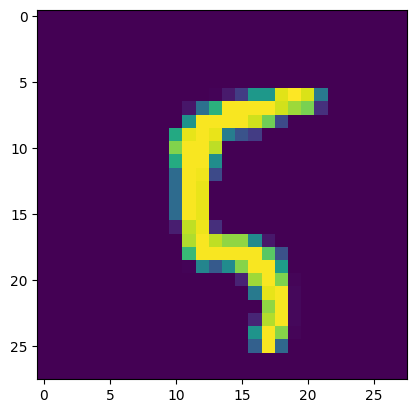

In [ ]:
img_id = 100

print('Image Shape:', x_train[img_id].shape)
print('Image Label Array:', y_train[img_id], 
      '\nImage Label Shape:', y_train[img_id].shape, 
      '\nImage Label:', np.argmax(y_train[img_id]))

plt.imshow(x_train[img_id].reshape(28, 28))
plt.show()

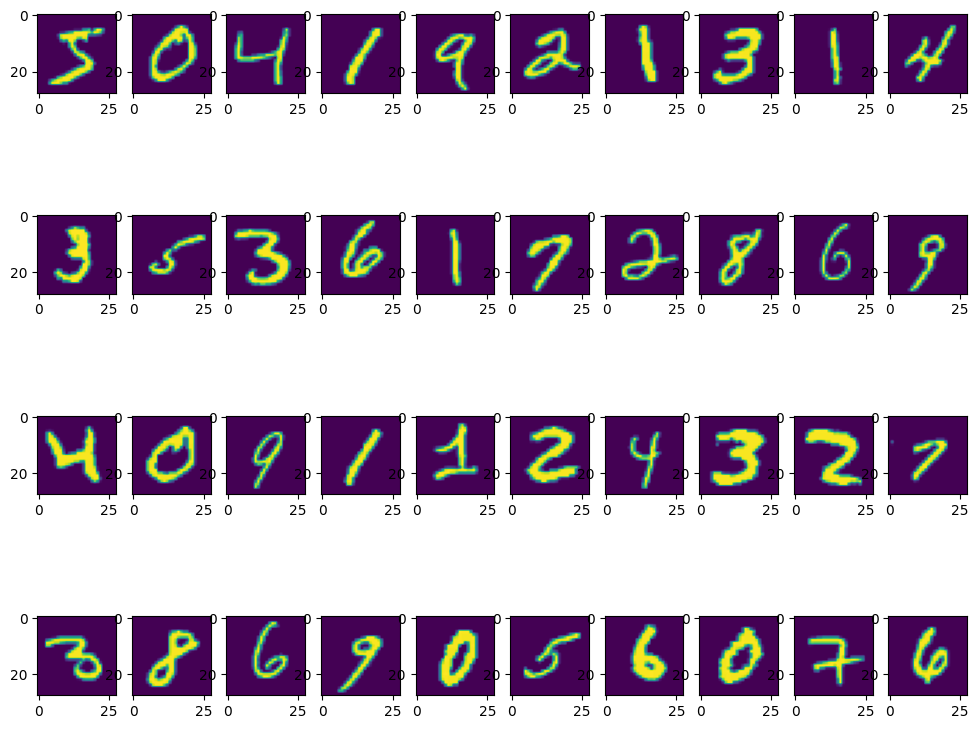

In [ ]:
# preview some images

plt.figure(figsize=(12, 10))
x, y = 10, 4

for i in range(40):  
    plt.subplot(y, x, i + 1)
    plt.imshow(x_train[i].reshape((28, 28)))
plt.show()

## Make Model

In [ ]:
from keras import layers

In [ ]:
def make_cnn_model():
    input_shape = (28, 28, 1)

    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_of_classes, activation="softmax"),
        ]
    )
    return model

In [ ]:
def show_training_history(history):
  print(history.history.keys())
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  train_loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.plot(list(range(len(train_accuracy))), train_accuracy, 'bo', label='Training accuracy')
  plt.plot(list(range(len(val_accuracy))), val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(list(range(len(train_loss))), train_loss, 'bo', label='Training loss')
  plt.plot(list(range(len(val_loss))), val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

# Size of Train Data

## 100 Examples

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 2.3109 - accuracy: 0.1333 - val_loss: 2.1742 - val_accuracy: 0.1000
Epoch 2/10
1/1 [==============================] - 0s 125ms/step - loss: 2.0732 - accuracy: 0.2556 - val_loss: 1.9566 - val_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 128ms/step - loss: 1.8608 - accuracy: 0.4667 - val_loss: 1.3585 - val_accuracy: 0.7000
Epoch 4/10
1/1 [==============================] - 0s 148ms/step - loss: 1.3511 - accuracy: 0.5889 - val_loss: 0.8383 - val_accuracy: 0.8000
Epoch 5/10
1/1 [==============================] - 0s 160ms/step - loss: 0.9729 - accuracy: 0.7444 - val_loss: 0.4461 - val_accuracy: 0.9000
Epoch 6/10
1/1 [==============================] - 0s 190ms/step - loss: 0.7589 - accuracy: 0.7667 - val_loss: 0.3909 - val_accuracy: 0.8000
Epoch 7/10
1/1 [==============================] - 0s 214ms/step - loss: 0.6027 - accuracy: 0.7667 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======

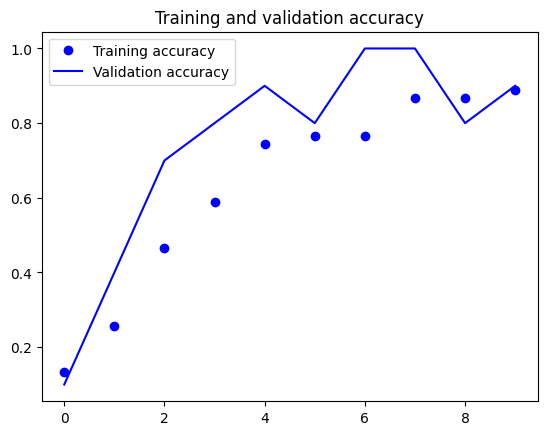

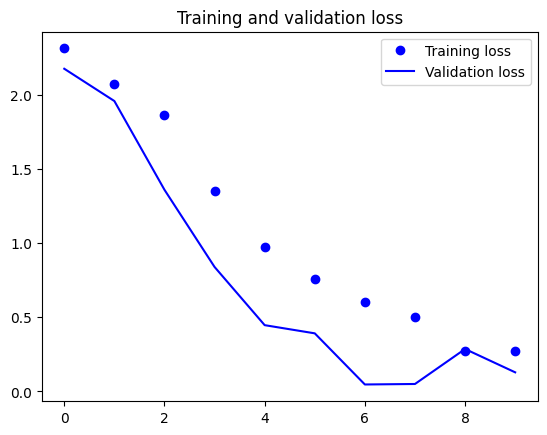

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:100], y_train[:100], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

## 1000 Examples

Epoch 1/10
8/8 [==============================] - 2s 197ms/step - loss: 1.7176 - accuracy: 0.4233 - val_loss: 1.5325 - val_accuracy: 0.5900
Epoch 2/10
8/8 [==============================] - 1s 148ms/step - loss: 0.8537 - accuracy: 0.7622 - val_loss: 0.7472 - val_accuracy: 0.7300
Epoch 3/10
8/8 [==============================] - 1s 148ms/step - loss: 0.4192 - accuracy: 0.8778 - val_loss: 0.4314 - val_accuracy: 0.9100
Epoch 4/10
8/8 [==============================] - 1s 147ms/step - loss: 0.2763 - accuracy: 0.9178 - val_loss: 0.3786 - val_accuracy: 0.9100
Epoch 5/10
8/8 [==============================] - 1s 104ms/step - loss: 0.2414 - accuracy: 0.9344 - val_loss: 0.4440 - val_accuracy: 0.9000
Epoch 6/10
8/8 [==============================] - 1s 99ms/step - loss: 0.1877 - accuracy: 0.9389 - val_loss: 0.2870 - val_accuracy: 0.9300
Epoch 7/10
8/8 [==============================] - 1s 99ms/step - loss: 0.1318 - accuracy: 0.9567 - val_loss: 0.3574 - val_accuracy: 0.9100
Epoch 8/10
8/8 [======

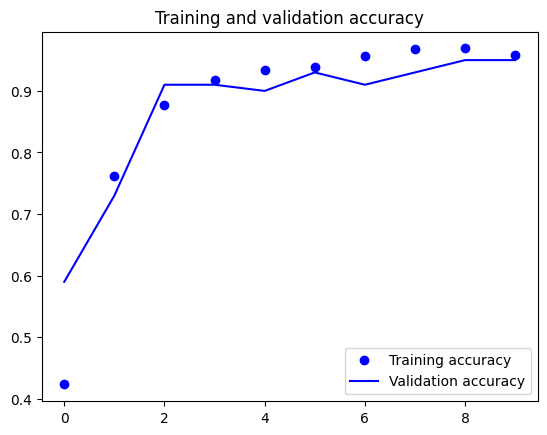

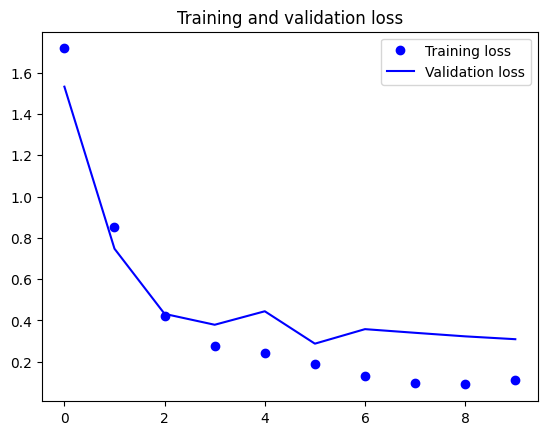

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:1000], y_train[:1000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

##5000 examples

Epoch 1/10
36/36 [==============================] - 5s 120ms/step - loss: 0.7310 - accuracy: 0.7647 - val_loss: 0.2996 - val_accuracy: 0.9240
Epoch 2/10
36/36 [==============================] - 4s 113ms/step - loss: 0.1897 - accuracy: 0.9440 - val_loss: 0.1563 - val_accuracy: 0.9620
Epoch 3/10
36/36 [==============================] - 5s 139ms/step - loss: 0.1263 - accuracy: 0.9600 - val_loss: 0.1082 - val_accuracy: 0.9720
Epoch 4/10
36/36 [==============================] - 4s 105ms/step - loss: 0.1041 - accuracy: 0.9678 - val_loss: 0.0826 - val_accuracy: 0.9800
Epoch 5/10
36/36 [==============================] - 4s 113ms/step - loss: 0.0802 - accuracy: 0.9740 - val_loss: 0.0964 - val_accuracy: 0.9660
Epoch 6/10
36/36 [==============================] - 5s 142ms/step - loss: 0.0846 - accuracy: 0.9744 - val_loss: 0.0876 - val_accuracy: 0.9780
Epoch 7/10
36/36 [==============================] - 4s 108ms/step - loss: 0.0903 - accuracy: 0.9700 - val_loss: 0.0917 - val_accuracy: 0.9700
Epoch 

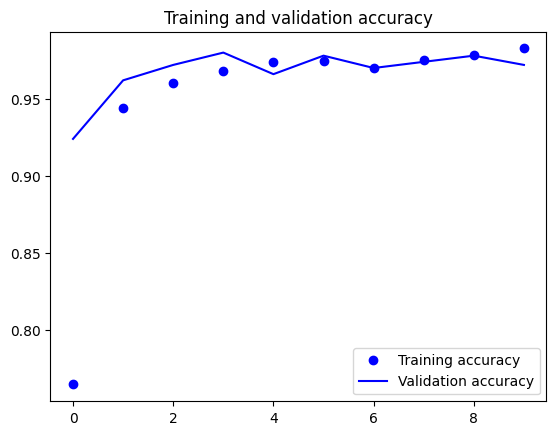

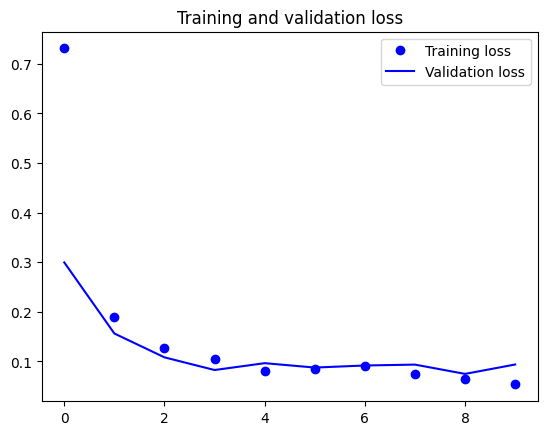

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

# Models

## Good Model

In [ ]:
input_shape = (28, 28, 1)


model_v1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_of_classes, activation="softmax"),
    ]
)

model_v1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### Bad Model

In [ ]:
input_shape = (28, 28, 1)

model_v2 = keras.Sequential(
    [
        layers.Flatten(input_shape=input_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_of_classes),
    ]
)

model_v2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


##Train Different Models

Epoch 1/10
36/36 [==============================] - 6s 149ms/step - loss: 0.6802 - accuracy: 0.7827 - val_loss: 0.2424 - val_accuracy: 0.9380
Epoch 2/10
36/36 [==============================] - 4s 106ms/step - loss: 0.1823 - accuracy: 0.9449 - val_loss: 0.1526 - val_accuracy: 0.9600
Epoch 3/10
36/36 [==============================] - 4s 105ms/step - loss: 0.1389 - accuracy: 0.9598 - val_loss: 0.1436 - val_accuracy: 0.9620
Epoch 4/10
36/36 [==============================] - 5s 136ms/step - loss: 0.1144 - accuracy: 0.9662 - val_loss: 0.1069 - val_accuracy: 0.9700
Epoch 5/10
36/36 [==============================] - 4s 116ms/step - loss: 0.0849 - accuracy: 0.9756 - val_loss: 0.0998 - val_accuracy: 0.9660
Epoch 6/10
36/36 [==============================] - 4s 103ms/step - loss: 0.0786 - accuracy: 0.9762 - val_loss: 0.1051 - val_accuracy: 0.9700
Epoch 7/10
36/36 [==============================] - 5s 127ms/step - loss: 0.0617 - accuracy: 0.9780 - val_loss: 0.0923 - val_accuracy: 0.9760
Epoch 

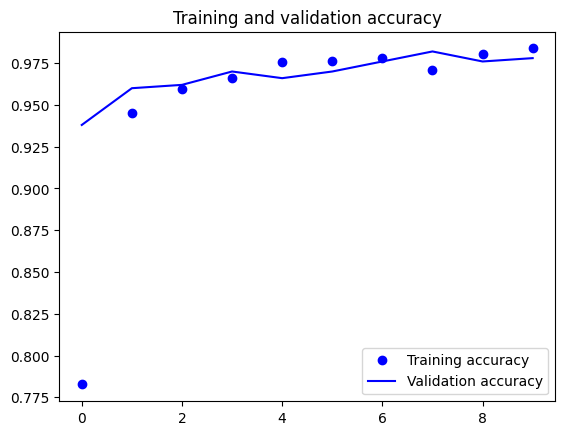

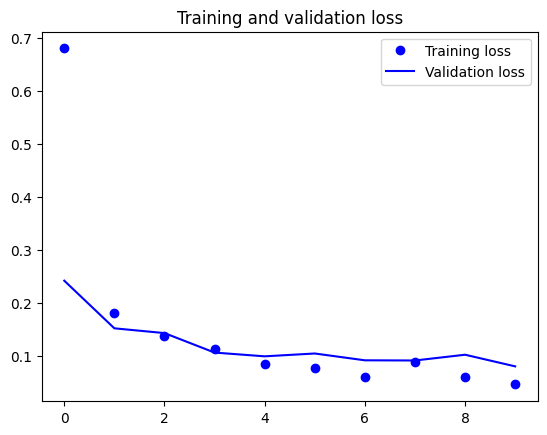

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10


model_v1.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model_v1.fit(x_train[:5000], y_train[:5000], 
                       batch_size=batch_size,
                       epochs=epochs, 
                       validation_split=0.1)

show_training_history(history)

Epoch 1/10
36/36 [==============================] - 1s 13ms/step - loss: 9.1575 - accuracy: 0.2178 - val_loss: 8.4459 - val_accuracy: 0.2360
Epoch 2/10
36/36 [==============================] - 0s 8ms/step - loss: 9.7461 - accuracy: 0.2309 - val_loss: 8.7038 - val_accuracy: 0.2460
Epoch 3/10
36/36 [==============================] - 0s 8ms/step - loss: 9.9502 - accuracy: 0.2340 - val_loss: 8.7360 - val_accuracy: 0.2460
Epoch 4/10
36/36 [==============================] - 0s 8ms/step - loss: 9.9646 - accuracy: 0.2342 - val_loss: 8.7360 - val_accuracy: 0.2460
Epoch 5/10
36/36 [==============================] - 0s 6ms/step - loss: 9.9646 - accuracy: 0.2342 - val_loss: 8.7360 - val_accuracy: 0.2460
Epoch 6/10
36/36 [==============================] - 0s 8ms/step - loss: 9.9646 - accuracy: 0.2342 - val_loss: 8.7360 - val_accuracy: 0.2460
Epoch 7/10
36/36 [==============================] - 0s 7ms/step - loss: 9.9646 - accuracy: 0.2342 - val_loss: 8.7360 - val_accuracy: 0.2460
Epoch 8/10
36/36 [=

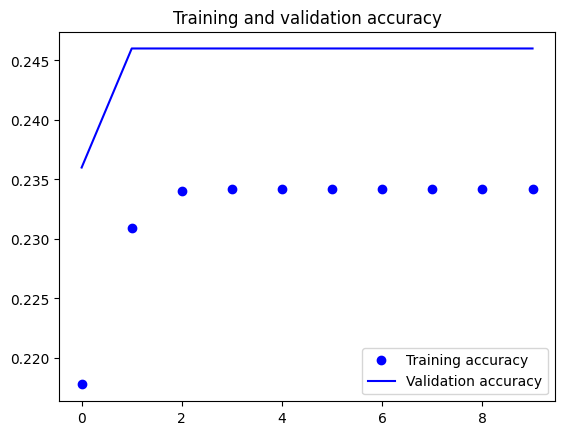

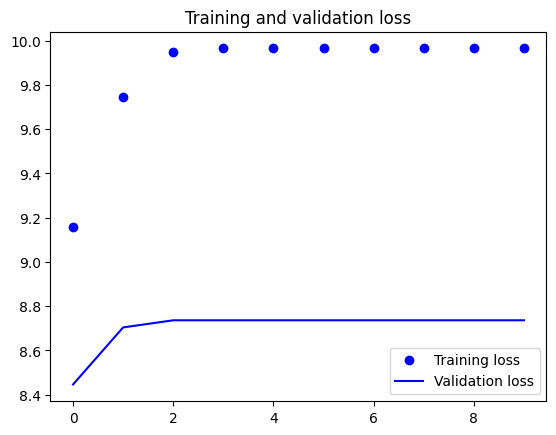

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10


model_v2.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model_v2.fit(x_train[:5000], y_train[:5000], 
                       batch_size=batch_size,
                       epochs=epochs, 
                       validation_split=0.1)

show_training_history(history)

# Learning Rate

Epoch 1/10
36/36 [==============================] - 6s 155ms/step - loss: 2.3101 - accuracy: 0.0953 - val_loss: 2.3001 - val_accuracy: 0.0840
Epoch 2/10
36/36 [==============================] - 4s 110ms/step - loss: 2.3018 - accuracy: 0.1007 - val_loss: 2.2918 - val_accuracy: 0.1140
Epoch 3/10
36/36 [==============================] - 4s 107ms/step - loss: 2.2961 - accuracy: 0.1147 - val_loss: 2.2837 - val_accuracy: 0.1420
Epoch 4/10
36/36 [==============================] - 5s 150ms/step - loss: 2.2887 - accuracy: 0.1276 - val_loss: 2.2755 - val_accuracy: 0.1620
Epoch 5/10
36/36 [==============================] - 4s 107ms/step - loss: 2.2785 - accuracy: 0.1362 - val_loss: 2.2674 - val_accuracy: 0.1880
Epoch 6/10
36/36 [==============================] - 4s 107ms/step - loss: 2.2736 - accuracy: 0.1538 - val_loss: 2.2591 - val_accuracy: 0.2180
Epoch 7/10
36/36 [==============================] - 5s 149ms/step - loss: 2.2631 - accuracy: 0.1700 - val_loss: 2.2504 - val_accuracy: 0.2560
Epoch 

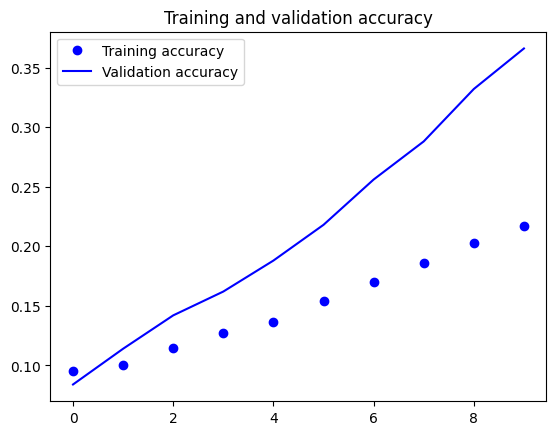

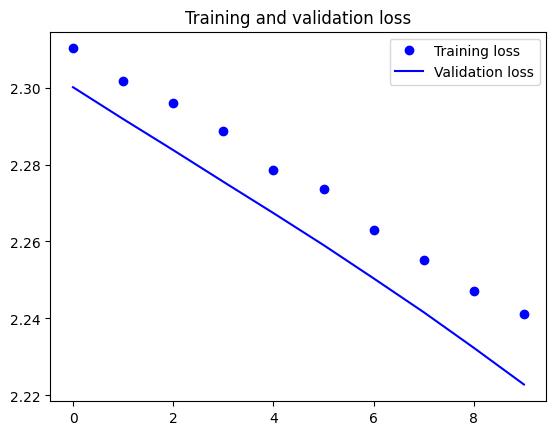

In [ ]:
learning_rate = 0.00001
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

Epoch 1/10
36/36 [==============================] - 5s 111ms/step - loss: 0.7040 - accuracy: 0.7744 - val_loss: 0.2017 - val_accuracy: 0.9380
Epoch 2/10
36/36 [==============================] - 5s 145ms/step - loss: 0.1944 - accuracy: 0.9424 - val_loss: 0.1589 - val_accuracy: 0.9500
Epoch 3/10
36/36 [==============================] - 4s 105ms/step - loss: 0.1325 - accuracy: 0.9589 - val_loss: 0.1307 - val_accuracy: 0.9540
Epoch 4/10
36/36 [==============================] - 4s 105ms/step - loss: 0.1055 - accuracy: 0.9664 - val_loss: 0.1230 - val_accuracy: 0.9540
Epoch 5/10
36/36 [==============================] - 5s 142ms/step - loss: 0.0964 - accuracy: 0.9696 - val_loss: 0.0967 - val_accuracy: 0.9680
Epoch 6/10
36/36 [==============================] - 4s 103ms/step - loss: 0.0793 - accuracy: 0.9733 - val_loss: 0.1011 - val_accuracy: 0.9680
Epoch 7/10
36/36 [==============================] - 4s 103ms/step - loss: 0.0689 - accuracy: 0.9762 - val_loss: 0.1112 - val_accuracy: 0.9680
Epoch 

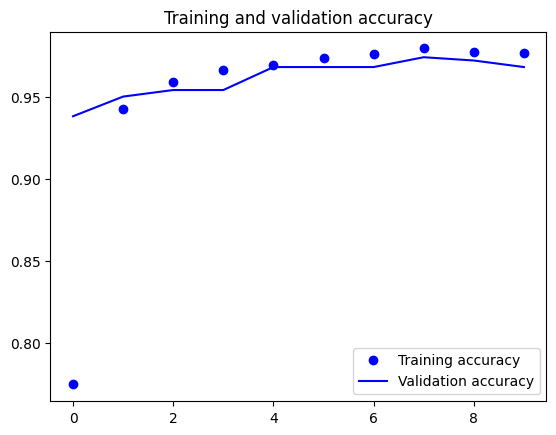

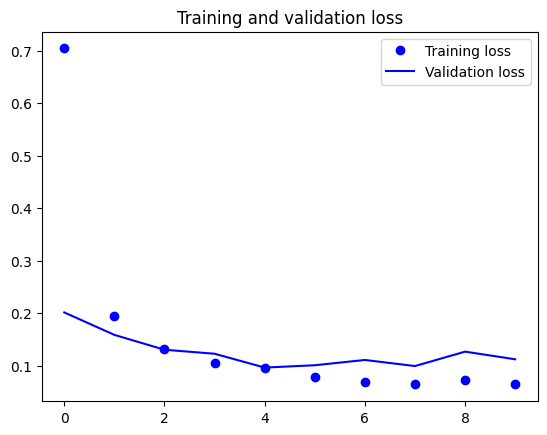

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

Epoch 1/10
36/36 [==============================] - 5s 123ms/step - loss: 4.1765 - accuracy: 0.1044 - val_loss: 2.2997 - val_accuracy: 0.1120
Epoch 2/10
36/36 [==============================] - 5s 124ms/step - loss: 2.3068 - accuracy: 0.1069 - val_loss: 2.3007 - val_accuracy: 0.1020
Epoch 3/10
36/36 [==============================] - 4s 102ms/step - loss: 2.3070 - accuracy: 0.1093 - val_loss: 2.3026 - val_accuracy: 0.0960
Epoch 4/10
36/36 [==============================] - 4s 108ms/step - loss: 2.3060 - accuracy: 0.1011 - val_loss: 2.3062 - val_accuracy: 0.1120
Epoch 5/10
36/36 [==============================] - 5s 139ms/step - loss: 2.3078 - accuracy: 0.1087 - val_loss: 2.3045 - val_accuracy: 0.0960
Epoch 6/10
36/36 [==============================] - 4s 104ms/step - loss: 2.3068 - accuracy: 0.0964 - val_loss: 2.2989 - val_accuracy: 0.1260
Epoch 7/10
36/36 [==============================] - 4s 103ms/step - loss: 2.3062 - accuracy: 0.1100 - val_loss: 2.3096 - val_accuracy: 0.1120
Epoch 

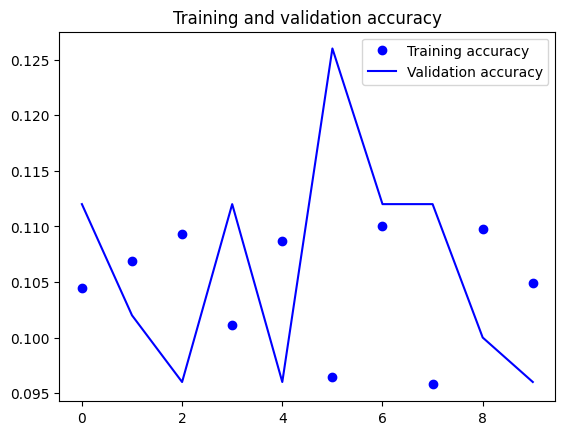

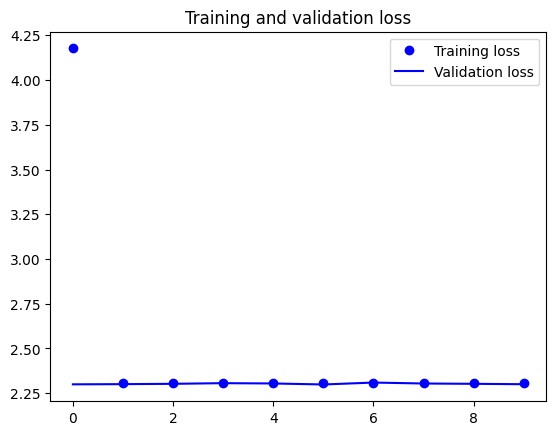

In [ ]:
learning_rate = 0.1
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

# Optimizers

## SGD

Epoch 1/10
36/36 [==============================] - 6s 164ms/step - loss: 2.2990 - accuracy: 0.1316 - val_loss: 2.2614 - val_accuracy: 0.2400
Epoch 2/10
36/36 [==============================] - 4s 108ms/step - loss: 2.2419 - accuracy: 0.2256 - val_loss: 2.2009 - val_accuracy: 0.3780
Epoch 3/10
36/36 [==============================] - 4s 110ms/step - loss: 2.1758 - accuracy: 0.3204 - val_loss: 2.1096 - val_accuracy: 0.5140
Epoch 4/10
36/36 [==============================] - 5s 149ms/step - loss: 2.0675 - accuracy: 0.4078 - val_loss: 1.9546 - val_accuracy: 0.6340
Epoch 5/10
36/36 [==============================] - 4s 111ms/step - loss: 1.8981 - accuracy: 0.4807 - val_loss: 1.7007 - val_accuracy: 0.7020
Epoch 6/10
36/36 [==============================] - 4s 111ms/step - loss: 1.6356 - accuracy: 0.5491 - val_loss: 1.3724 - val_accuracy: 0.7320
Epoch 7/10
36/36 [==============================] - 5s 147ms/step - loss: 1.3637 - accuracy: 0.5978 - val_loss: 1.0811 - val_accuracy: 0.7400
Epoch 

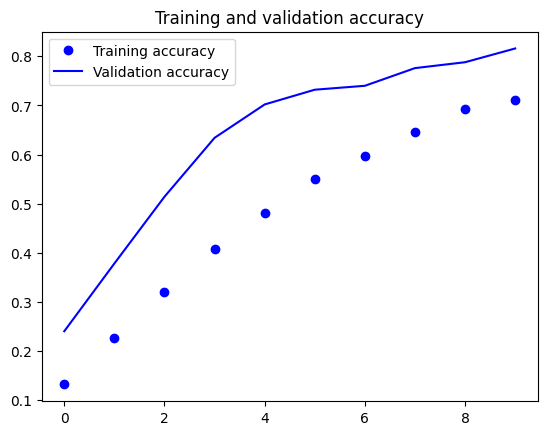

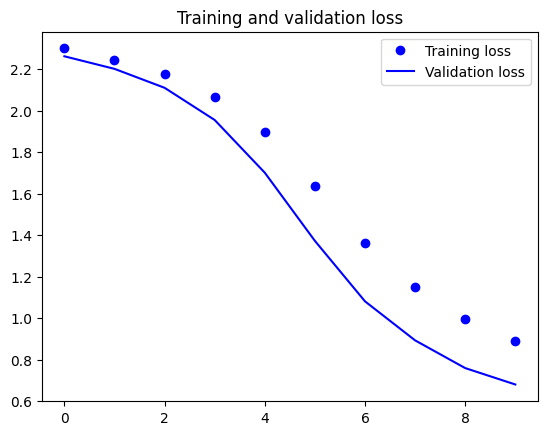

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

## Adagrad

Epoch 1/10
36/36 [==============================] - 6s 159ms/step - loss: 2.2528 - accuracy: 0.1742 - val_loss: 2.1408 - val_accuracy: 0.4180
Epoch 2/10
36/36 [==============================] - 4s 106ms/step - loss: 1.9617 - accuracy: 0.4289 - val_loss: 1.5821 - val_accuracy: 0.5440
Epoch 3/10
36/36 [==============================] - 5s 150ms/step - loss: 1.3003 - accuracy: 0.6127 - val_loss: 0.8526 - val_accuracy: 0.7640
Epoch 4/10
36/36 [==============================] - 4s 107ms/step - loss: 0.8874 - accuracy: 0.7258 - val_loss: 0.6764 - val_accuracy: 0.7920
Epoch 5/10
36/36 [==============================] - 4s 105ms/step - loss: 0.7008 - accuracy: 0.7798 - val_loss: 0.5175 - val_accuracy: 0.8440
Epoch 6/10
36/36 [==============================] - 5s 147ms/step - loss: 0.6068 - accuracy: 0.8142 - val_loss: 0.4611 - val_accuracy: 0.8580
Epoch 7/10
36/36 [==============================] - 4s 104ms/step - loss: 0.5296 - accuracy: 0.8427 - val_loss: 0.4261 - val_accuracy: 0.8700
Epoch 

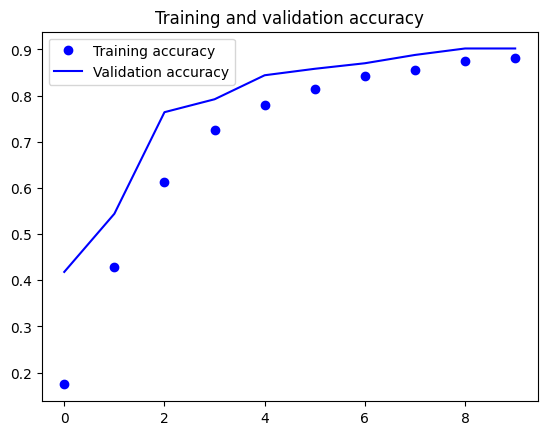

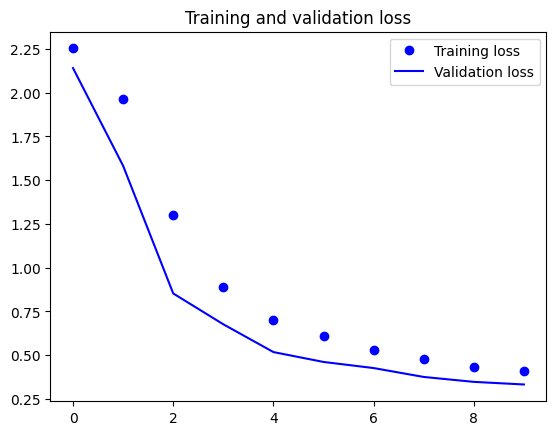

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adagrad(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

## Adam

Epoch 1/10
36/36 [==============================] - 7s 163ms/step - loss: 0.7256 - accuracy: 0.7733 - val_loss: 0.2734 - val_accuracy: 0.9200
Epoch 2/10
36/36 [==============================] - 6s 163ms/step - loss: 0.1913 - accuracy: 0.9427 - val_loss: 0.1714 - val_accuracy: 0.9580
Epoch 3/10
36/36 [==============================] - 4s 106ms/step - loss: 0.1438 - accuracy: 0.9576 - val_loss: 0.1122 - val_accuracy: 0.9780
Epoch 4/10
36/36 [==============================] - 4s 121ms/step - loss: 0.1107 - accuracy: 0.9656 - val_loss: 0.0982 - val_accuracy: 0.9680
Epoch 5/10
36/36 [==============================] - 5s 130ms/step - loss: 0.1031 - accuracy: 0.9698 - val_loss: 0.0965 - val_accuracy: 0.9720
Epoch 6/10
36/36 [==============================] - 4s 105ms/step - loss: 0.0866 - accuracy: 0.9742 - val_loss: 0.0911 - val_accuracy: 0.9720
Epoch 7/10
36/36 [==============================] - 4s 110ms/step - loss: 0.0685 - accuracy: 0.9796 - val_loss: 0.0821 - val_accuracy: 0.9760
Epoch 

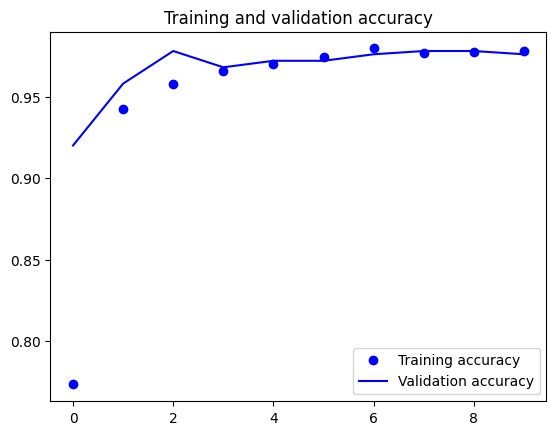

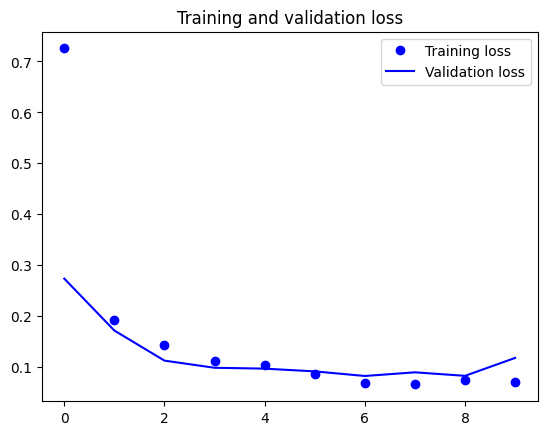

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

# Define Callbacks

In [ ]:
from keras import callbacks

###EarlyStopping


Epoch 1/100
36/36 [==============================] - 5s 112ms/step - loss: 0.7034 - accuracy: 0.7773 - val_loss: 0.2135 - val_accuracy: 0.9460
Epoch 2/100
36/36 [==============================] - 4s 105ms/step - loss: 0.1903 - accuracy: 0.9449 - val_loss: 0.1134 - val_accuracy: 0.9660
Epoch 3/100
36/36 [==============================] - 5s 145ms/step - loss: 0.1212 - accuracy: 0.9651 - val_loss: 0.1040 - val_accuracy: 0.9680
Epoch 4/100
36/36 [==============================] - 4s 104ms/step - loss: 0.1011 - accuracy: 0.9678 - val_loss: 0.0946 - val_accuracy: 0.9740
Epoch 5/100
36/36 [==============================] - 4s 104ms/step - loss: 0.0816 - accuracy: 0.9747 - val_loss: 0.0819 - val_accuracy: 0.9760
Epoch 6/100
36/36 [==============================] - 5s 146ms/step - loss: 0.0950 - accuracy: 0.9698 - val_loss: 0.1113 - val_accuracy: 0.9720
Epoch 7/100
36/36 [==============================] - 4s 102ms/step - loss: 0.0809 - accuracy: 0.9733 - val_loss: 0.0749 - val_accuracy: 0.9780

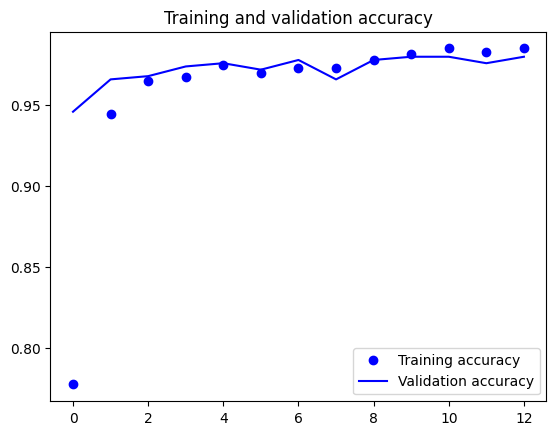

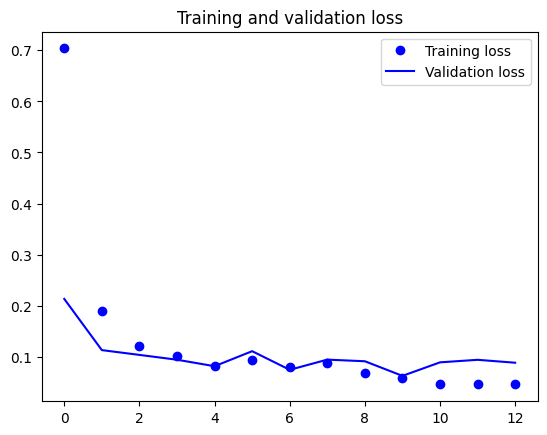

In [ ]:
early_stop_callback = callbacks.EarlyStopping(patience=3,
                                              verbose=1,
                                              monitor='val_loss')


learning_rate = 0.01
batch_size = 128
epochs = 100

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[early_stop_callback],
                    validation_split=0.1)

show_training_history(history)

###Adaptive learning rates (Reduce Learning Rate On Plateau)

Epoch 1/100
36/36 [==============================] - 6s 153ms/step - loss: 0.7070 - accuracy: 0.7831 - val_loss: 0.2390 - val_accuracy: 0.9300 - lr: 0.0100
Epoch 2/100
36/36 [==============================] - 4s 108ms/step - loss: 0.1957 - accuracy: 0.9413 - val_loss: 0.1536 - val_accuracy: 0.9580 - lr: 0.0100
Epoch 3/100
36/36 [==============================] - 4s 106ms/step - loss: 0.1305 - accuracy: 0.9604 - val_loss: 0.1143 - val_accuracy: 0.9680 - lr: 0.0100
Epoch 4/100
36/36 [==============================] - 5s 146ms/step - loss: 0.1066 - accuracy: 0.9678 - val_loss: 0.1179 - val_accuracy: 0.9660 - lr: 0.0100
Epoch 5/100
36/36 [==============================] - 4s 104ms/step - loss: 0.0857 - accuracy: 0.9736 - val_loss: 0.1079 - val_accuracy: 0.9720 - lr: 0.0100
Epoch 6/100
36/36 [==============================] - 4s 105ms/step - loss: 0.0877 - accuracy: 0.9738 - val_loss: 0.0884 - val_accuracy: 0.9780 - lr: 0.0100
Epoch 7/100
36/36 [==============================] - 5s 141ms/st

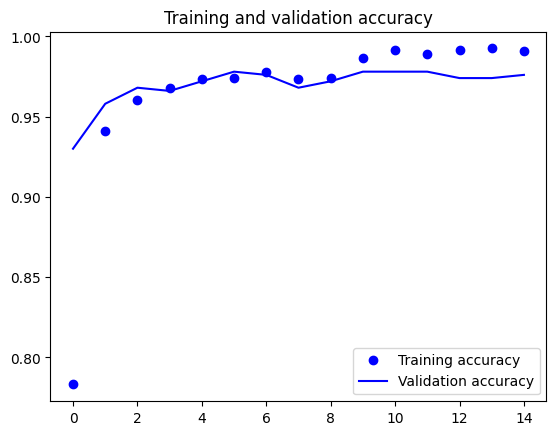

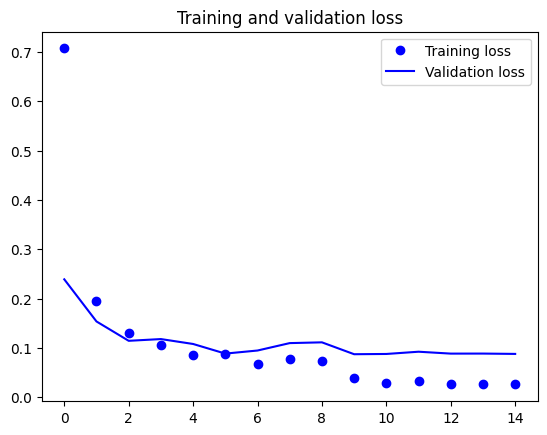

In [ ]:
early_stop_callback = callbacks.EarlyStopping(patience=5,
                                              verbose=1,
                                              monitor='val_loss')

reduce_lr_callback = callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.1,
                                                 min_lr=1e-8,
                                                 verbose=1,
                                                 patience=3)


learning_rate = 0.01
batch_size = 128
epochs = 100

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[early_stop_callback, reduce_lr_callback],
                    validation_split=0.1)

show_training_history(history)

###Model Checkpoint


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/20
35/36 [============================>.] - ETA: 0s - loss: 0.6641 - accuracy: 0.7877
Epoch 1: val_loss improved from inf to 0.19849, saving model to /content/drive/MyDrive/AI Class/2023-1/mnist_models/my_best_model.h5
36/36 [==============================] - 39s 1s/step - loss: 0.6620 - accuracy: 0.7884 - val_loss: 0.1985 - val_accuracy: 0.9500
Epoch 2/20
35/36 [============================>.] - ETA: 0s - loss: 0.1811 - accuracy: 0.9475
Epoch 2: val_loss improved from 0.19849 to 0.12600, saving model to /content/drive/MyDrive/AI Class/2023-1/mnist_models/my_best_model.h5
36/36 [==============================] - 4s 119ms/step - loss: 0.1822 - accuracy: 0.9476 - val_loss: 0.1260 - val_accuracy: 0.9560
Epoch 3/20
35/36 [============================>.] - ETA: 0s - loss: 0.1226 - accuracy: 0.9650
Epoch 3: val_loss improved from 0.12600 to 0.11050, saving model to /content/drive/MyDrive/AI Class/2023-1/mnist_models/my_best_model.h5
36/36 [==============================] - 6s 153ms/s

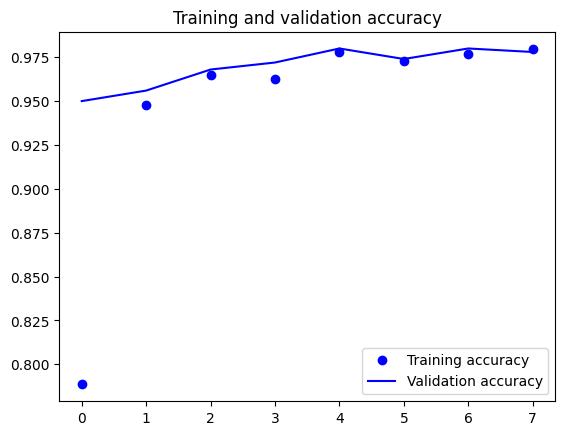

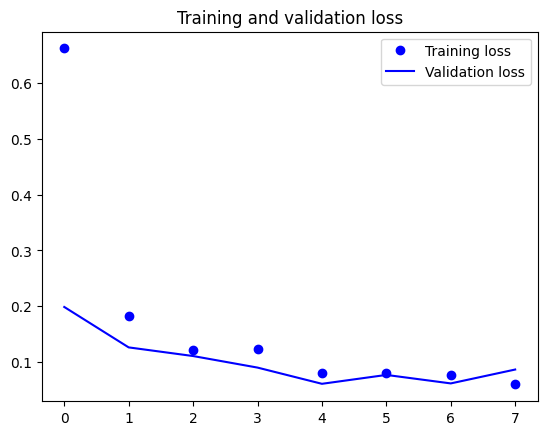

In [ ]:
early_stop_callback = callbacks.EarlyStopping(patience=3,
                                              verbose=1,
                                              monitor='val_loss')


model_path = '/content/drive/MyDrive/AI Class/2023-1/mnist_models/my_best_model.h5'
# model_path = '/content/drive/MyDrive/AI Class/2023-1/mnist_models/model_epoch_{epoch:03d}.h5'

checkpoint_callback = callbacks.ModelCheckpoint(model_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_freq='epoch',
                                                save_best_only=True)

learning_rate = 0.01
batch_size = 128
epochs = 20

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[early_stop_callback, checkpoint_callback],
                    validation_split=0.1)

show_training_history(history)

###Custom Callback

In [ ]:
class AdaptiveLearningRate(callbacks.Callback):
    def __init__(self, factor=0.5, patience=5, min_lr=1e-7):
        super().__init__()
        self.factor = factor
        self.patience = patience
        self.min_lr = min_lr
        self.best_val_loss = float('inf')
        self.wait = 0
    
    def on_epoch_end(self, epoch, logs=None):
        current_val_loss = logs.get('val_loss')
        if current_val_loss < self.best_val_loss:
            self.best_val_loss = current_val_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                old_lr = float(self.model.optimizer.learning_rate.numpy())
                new_lr = max(old_lr * self.factor, self.min_lr)
                print(f'\nReducing learning rate from {old_lr:.8f} to {new_lr:.8f}')
                self.model.optimizer.learning_rate.assign(new_lr)
                self.wait = 0

    def on_train_begin(self, logs=None):
        print('Training Started!')

    def on_train_end(self, logs=None):
        print('Training Finished!')

    def on_epoch_begin(self, epoch, logs=None):
        pass

    def on_train_batch_begin(self, batch, logs=None):
        pass

    def on_train_batch_end(self, batch, logs=None):
        pass
    
    # ...... more ......

Training Started!
Epoch 1/20
36/36 [==============================] - 5s 118ms/step - loss: 0.7936 - accuracy: 0.7413 - val_loss: 0.2622 - val_accuracy: 0.9220
Epoch 2/20
36/36 [==============================] - 6s 178ms/step - loss: 0.1927 - accuracy: 0.9453 - val_loss: 0.1490 - val_accuracy: 0.9560
Epoch 3/20
36/36 [==============================] - 4s 111ms/step - loss: 0.1237 - accuracy: 0.9611 - val_loss: 0.1064 - val_accuracy: 0.9680
Epoch 4/20
36/36 [==============================] - 4s 114ms/step - loss: 0.1001 - accuracy: 0.9676 - val_loss: 0.1229 - val_accuracy: 0.9620
Epoch 5/20
36/36 [==============================] - 6s 156ms/step - loss: 0.0974 - accuracy: 0.9684 - val_loss: 0.0925 - val_accuracy: 0.9720
Epoch 6/20
36/36 [==============================] - 4s 114ms/step - loss: 0.0836 - accuracy: 0.9731 - val_loss: 0.1002 - val_accuracy: 0.9740
Epoch 7/20
36/36 [==============================] - 5s 131ms/step - loss: 0.0811 - accuracy: 0.9742 - val_loss: 0.0936 - val_accur

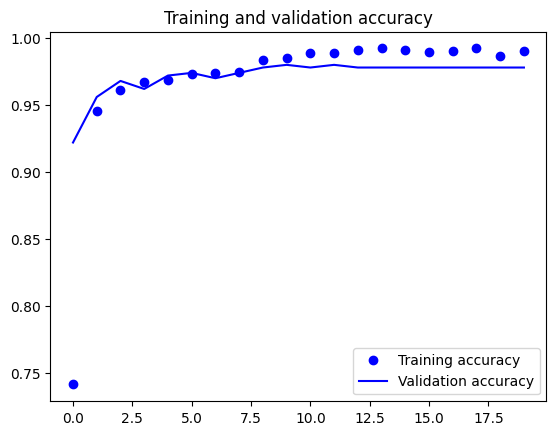

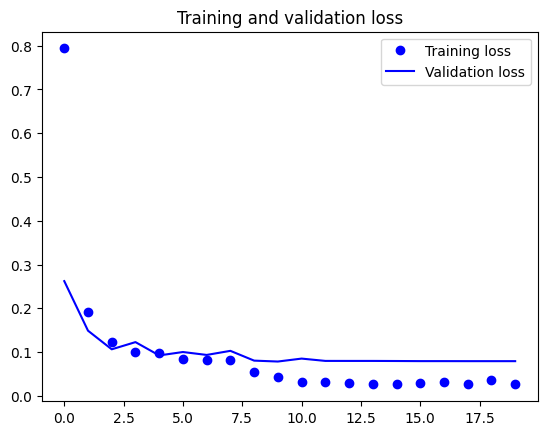

In [ ]:
adaptive_lr_callback = AdaptiveLearningRate(factor=0.1, 
                                            patience=3, 
                                            min_lr=1e-6)


learning_rate = 0.01
batch_size = 128
epochs = 20

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[adaptive_lr_callback],
                    validation_split=0.1)

show_training_history(history)

# Dropout

In [ ]:
def make_cnn_model_no_dropout():
    input_shape = (28, 28, 1)

    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dense(num_of_classes, activation="softmax"),
        ]
    )
    return model

### With Dropout

Epoch 1/20
36/36 [==============================] - 6s 121ms/step - loss: 0.6823 - accuracy: 0.7780 - val_loss: 0.2094 - val_accuracy: 0.9440
Epoch 2/20
36/36 [==============================] - 4s 114ms/step - loss: 0.1914 - accuracy: 0.9440 - val_loss: 0.1555 - val_accuracy: 0.9600
Epoch 3/20
36/36 [==============================] - 6s 174ms/step - loss: 0.1307 - accuracy: 0.9611 - val_loss: 0.1057 - val_accuracy: 0.9660
Epoch 4/20
36/36 [==============================] - 4s 113ms/step - loss: 0.1058 - accuracy: 0.9664 - val_loss: 0.0985 - val_accuracy: 0.9740
Epoch 5/20
36/36 [==============================] - 4s 116ms/step - loss: 0.0927 - accuracy: 0.9729 - val_loss: 0.0830 - val_accuracy: 0.9720
Epoch 6/20
36/36 [==============================] - 6s 174ms/step - loss: 0.0863 - accuracy: 0.9720 - val_loss: 0.0800 - val_accuracy: 0.9740
Epoch 7/20
36/36 [==============================] - 4s 110ms/step - loss: 0.0756 - accuracy: 0.9760 - val_loss: 0.0675 - val_accuracy: 0.9780
Epoch 

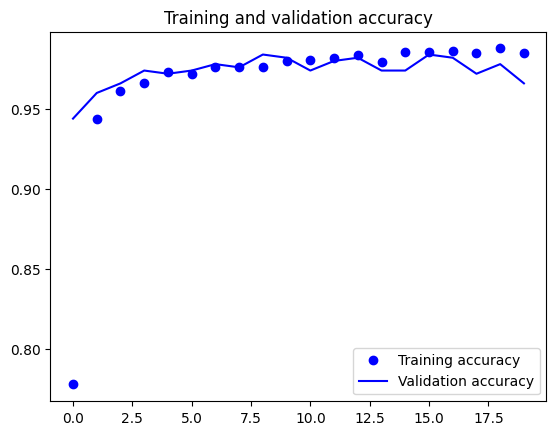

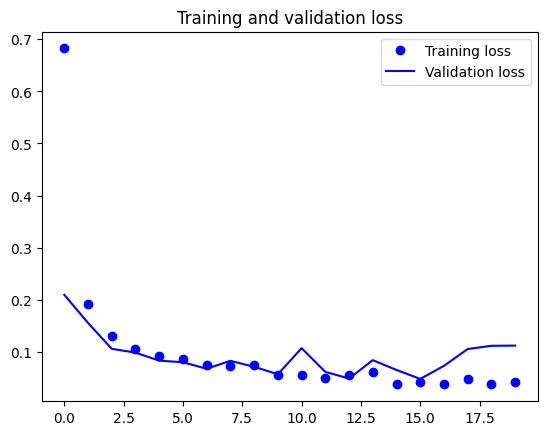

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 20

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

### Without Dropout

Epoch 1/20
36/36 [==============================] - 6s 152ms/step - loss: 0.5849 - accuracy: 0.8251 - val_loss: 0.2158 - val_accuracy: 0.9400
Epoch 2/20
36/36 [==============================] - 5s 133ms/step - loss: 0.1379 - accuracy: 0.9627 - val_loss: 0.1162 - val_accuracy: 0.9640
Epoch 3/20
36/36 [==============================] - 4s 112ms/step - loss: 0.0751 - accuracy: 0.9793 - val_loss: 0.1091 - val_accuracy: 0.9700
Epoch 4/20
36/36 [==============================] - 5s 128ms/step - loss: 0.0453 - accuracy: 0.9871 - val_loss: 0.1536 - val_accuracy: 0.9620
Epoch 5/20
36/36 [==============================] - 6s 154ms/step - loss: 0.0349 - accuracy: 0.9880 - val_loss: 0.1158 - val_accuracy: 0.9680
Epoch 6/20
36/36 [==============================] - 4s 108ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0838 - val_accuracy: 0.9720
Epoch 7/20
36/36 [==============================] - 4s 111ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.1527 - val_accuracy: 0.9560
Epoch 

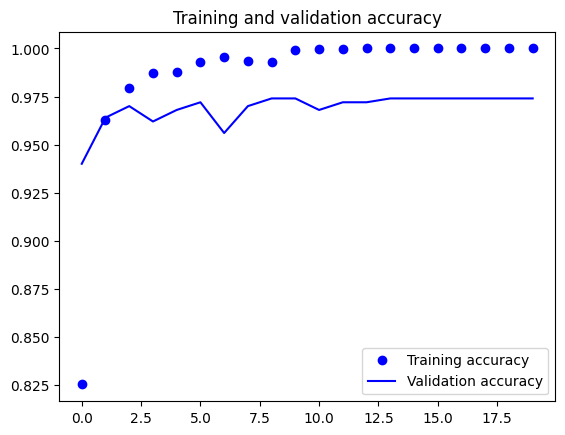

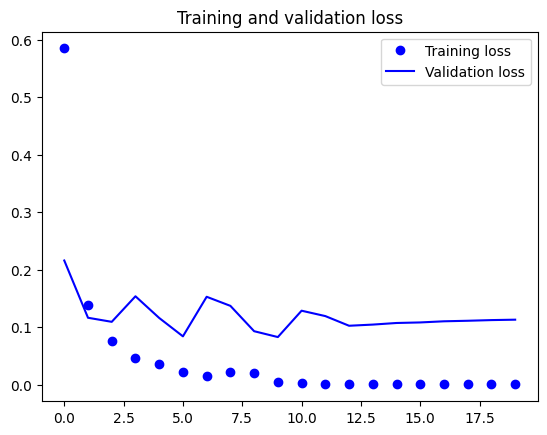

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 20

model = make_cnn_model_no_dropout()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

show_training_history(history)

##Tensorboard Checkpoint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
log_dir_path = '/content/drive/MyDrive/AI Class/2023-1/mnist_training_logs'
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir_path)


learning_rate = 0.01
batch_size = 128
epochs = 10

model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[tensorboard_callback],
                    validation_split=0.1)

Epoch 1/10
36/36 [==============================] - 6s 127ms/step - loss: 0.6843 - accuracy: 0.7856 - val_loss: 0.2449 - val_accuracy: 0.9280
Epoch 2/10
36/36 [==============================] - 4s 119ms/step - loss: 0.1970 - accuracy: 0.9442 - val_loss: 0.1666 - val_accuracy: 0.9540
Epoch 3/10
36/36 [==============================] - 6s 164ms/step - loss: 0.1501 - accuracy: 0.9533 - val_loss: 0.1260 - val_accuracy: 0.9640
Epoch 4/10
36/36 [==============================] - 4s 110ms/step - loss: 0.1123 - accuracy: 0.9671 - val_loss: 0.1455 - val_accuracy: 0.9560
Epoch 5/10
36/36 [==============================] - 4s 109ms/step - loss: 0.1055 - accuracy: 0.9633 - val_loss: 0.0946 - val_accuracy: 0.9720
Epoch 6/10
36/36 [==============================] - 6s 175ms/step - loss: 0.0897 - accuracy: 0.9704 - val_loss: 0.0870 - val_accuracy: 0.9740
Epoch 7/10
36/36 [==============================] - 4s 107ms/step - loss: 0.0833 - accuracy: 0.9756 - val_loss: 0.0823 - val_accuracy: 0.9760
Epoch 

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir='/content/drive/MyDrive/AI Class/2023-1/mnist_training_logs'

## Train

### Set Training Parameters

In [ ]:
learning_rate = 0.01
batch_size = 128
epochs = 10


model = make_cnn_model()

model.compile(loss="categorical_crossentropy", 
              optimizer=keras.optimizers.Adam(learning_rate),
              metrics=["accuracy"])

history = model.fit(x_train[:5000], y_train[:5000], 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.1)

Epoch 1/10
36/36 [==============================] - 8s 210ms/step - loss: 0.6632 - accuracy: 0.7887 - val_loss: 0.1958 - val_accuracy: 0.9540
Epoch 2/10
36/36 [==============================] - 4s 121ms/step - loss: 0.1719 - accuracy: 0.9507 - val_loss: 0.1257 - val_accuracy: 0.9620
Epoch 3/10
36/36 [==============================] - 7s 199ms/step - loss: 0.1274 - accuracy: 0.9598 - val_loss: 0.1075 - val_accuracy: 0.9660
Epoch 4/10
36/36 [==============================] - 6s 163ms/step - loss: 0.1090 - accuracy: 0.9673 - val_loss: 0.0909 - val_accuracy: 0.9700
Epoch 5/10
36/36 [==============================] - 7s 193ms/step - loss: 0.0969 - accuracy: 0.9729 - val_loss: 0.0951 - val_accuracy: 0.9700
Epoch 6/10
36/36 [==============================] - 10s 277ms/step - loss: 0.0636 - accuracy: 0.9780 - val_loss: 0.0895 - val_accuracy: 0.9740
Epoch 7/10
36/36 [==============================] - 8s 204ms/step - loss: 0.0606 - accuracy: 0.9847 - val_loss: 0.0919 - val_accuracy: 0.9720
Epoch

## Test and Evaluate

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08025729656219482
Test accuracy: 0.9747999906539917


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

313/313 [==============================] - 4s 13ms/step


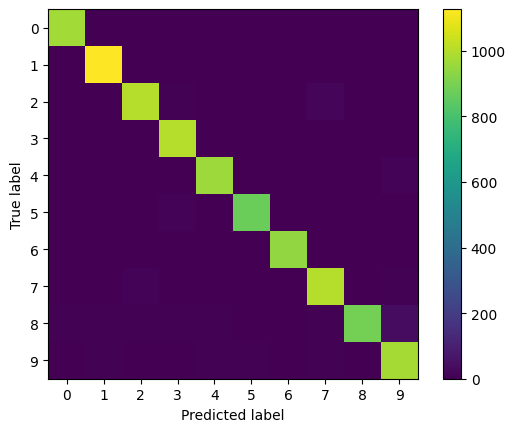

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.imshow(cm)
plt.colorbar()
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



```
# This is formatted as code
```

## Sample Prediction

Image shape: (28, 28, 1)
True Image Label Array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
True Image Label Shape: (10,) 
True Image Label: 7


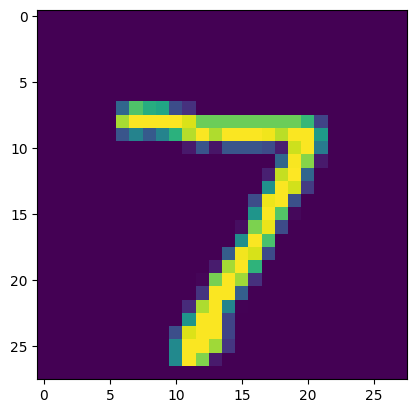

1/1 [==============================] - 0s 82ms/step
Predicted Image Label Array: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00'] 
Predicted Image Label Shape: (1, 10) 
Predicted Image Label: 7


In [ ]:
img_id = 0

sample_test_image = x_test[img_id]
sample_test_label = y_test[img_id]

print('Image shape:', sample_test_image.shape)
print('True Image Label Array:', sample_test_label, 
      '\nTrue Image Label Shape:', sample_test_label.shape,
      '\nTrue Image Label:', np.argmax(sample_test_label))
plt.imshow(sample_test_image.reshape(28, 28))
plt.show()



prediction = model.predict(sample_test_image.reshape(1, 28, 28, 1))

print('Predicted Image Label Array:', ['{0:0.2f}'.format(i) for i in prediction[0]],
      '\nPredicted Image Label Shape:', prediction.shape, 
      '\nPredicted Image Label:', np.argmax(prediction))